<a href="https://colab.research.google.com/github/pranabeshdash/ERAV2/blob/main/Session_5_Intro_PyTorch/S5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -rf ERAV2
!git clone https://github.com/pranabeshdash/ERAV2.git
!pip install torchvision
!pip install torchsummary

CODE BLOCK: 1

In [ ]:
from ERAV2.Session_7_InDepth_Coding.utils import *
from ERAV2.Session_5_InDepth_Coding.model import *

In [3]:
#from  utils import *
#from  model import *

CODE BLOCK: 2

In [10]:
#import sys
#print (sys.path)
#del sys.modules['utils']
#del sys.modules['model']
##del utils
#from model import *
#from utils import *

['c:\\Users\\dash\\anaconda3\\envs\\py310\\python310.zip', 'c:\\Users\\dash\\anaconda3\\envs\\py310\\DLLs', 'c:\\Users\\dash\\anaconda3\\envs\\py310\\lib', 'c:\\Users\\dash\\anaconda3\\envs\\py310', '', 'C:\\Users\\dash\\AppData\\Roaming\\Python\\Python310\\site-packages', 'c:\\Users\\dash\\anaconda3\\envs\\py310\\lib\\site-packages', 'c:\\Users\\dash\\anaconda3\\envs\\py310\\lib\\site-packages\\win32', 'c:\\Users\\dash\\anaconda3\\envs\\py310\\lib\\site-packages\\win32\\lib', 'c:\\Users\\dash\\anaconda3\\envs\\py310\\lib\\site-packages\\Pythonwin']


In [4]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = set_device()


CUDA Available? True


CODE BLOCK: 3

In [20]:
# Train data transformations
train_transforms = transforms.Compose([
    #transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.RandomAffine(degrees=10, translate=(0.1,0.1), scale=(0.9, 1.1)),
    #transforms.Resize((28, 28)),
    #transforms.RandomRotation((-7., 7.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [21]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

CODE BLOCK: 5

In [22]:
# set seed
torch.manual_seed(1)

batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = get_loader(test_data, kwargs)
train_loader = get_loader(train_data, kwargs)

CODE BLOCK: 6

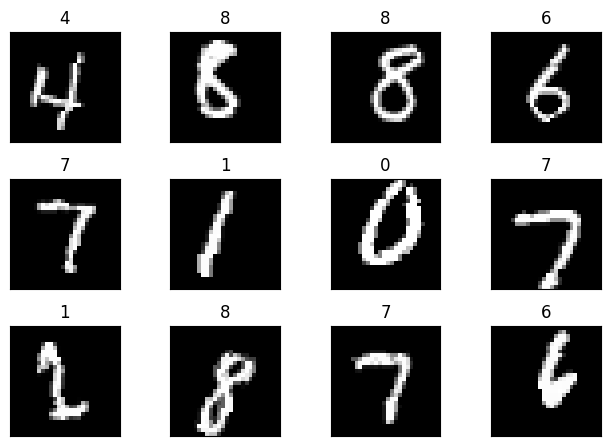

In [16]:
view_data(train_loader)

CODE BLOCK: 7

CODE BLOCK: 8

In [23]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

In [24]:
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 12, 24, 24]             864
              ReLU-6           [-1, 12, 24, 24]               0
       BatchNorm2d-7           [-1, 12, 24, 24]              24
           Dropout-8           [-1, 12, 24, 24]               0
            Conv2d-9           [-1, 10, 24, 24]             120
        MaxPool2d-10           [-1, 10, 12, 12]               0
           Conv2d-11           [-1, 14, 10, 10]           1,260
             ReLU-12           [-1, 14, 10, 10]               0
      BatchNorm2d-13           [-1, 14, 10, 10]              28
          Dropout-14           [-1, 14,

CODE BLOCK: 10

In [27]:


dropout_value = 0.05
model = Model_1_6(dropout_value=dropout_value).to(device)

summary(model, input_size=(1, 28, 28))

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion, train_acc, train_losses)
  test(model, device, test_loader, criterion, test_acc, test_losses)
  scheduler.step()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 12, 24, 24]             864
              ReLU-6           [-1, 12, 24, 24]               0
       BatchNorm2d-7           [-1, 12, 24, 24]              24
           Dropout-8           [-1, 12, 24, 24]               0
            Conv2d-9           [-1, 10, 24, 24]             120
        MaxPool2d-10           [-1, 10, 12, 12]               0
           Conv2d-11           [-1, 14, 10, 10]           1,260
             ReLU-12           [-1, 14, 10, 10]               0
      BatchNorm2d-13           [-1, 14, 10, 10]              28
          Dropout-14           [-1, 14,

Train: Loss=0.1662 Batch_id=117 Accuracy=77.09: 100%|██████████| 118/118 [00:07<00:00, 15.12it/s]


Test set: Average loss: 0.0959, Accuracy: 9695/10000 (96.95%)

Epoch 2


Train: Loss=0.1086 Batch_id=117 Accuracy=96.46: 100%|██████████| 118/118 [00:07<00:00, 16.10it/s]


Test set: Average loss: 0.0486, Accuracy: 9848/10000 (98.48%)

Epoch 3


Train: Loss=0.0627 Batch_id=117 Accuracy=97.29: 100%|██████████| 118/118 [00:07<00:00, 15.68it/s]


Test set: Average loss: 0.0385, Accuracy: 9882/10000 (98.82%)

Epoch 4


Train: Loss=0.0405 Batch_id=117 Accuracy=97.73: 100%|██████████| 118/118 [00:07<00:00, 15.72it/s]


Test set: Average loss: 0.0351, Accuracy: 9888/10000 (98.88%)

Epoch 5


Train: Loss=0.0199 Batch_id=117 Accuracy=97.81: 100%|██████████| 118/118 [00:07<00:00, 15.17it/s]


Test set: Average loss: 0.0412, Accuracy: 9877/10000 (98.77%)

Epoch 6


Train: Loss=0.0500 Batch_id=117 Accuracy=97.98: 100%|██████████| 118/118 [00:07<00:00, 16.31it/s]


Test set: Average loss: 0.0349, Accuracy: 9889/10000 (98.89%)

Epoch 7


Train: Loss=0.0403 Batch_id=117 Accuracy=98.08: 100%|██████████| 118/118 [00:07<00:00, 16.01it/s]


Test set: Average loss: 0.0270, Accuracy: 9920/10000 (99.20%)

Epoch 8


Train: Loss=0.0588 Batch_id=117 Accuracy=98.20: 100%|██████████| 118/118 [00:07<00:00, 16.12it/s]


Test set: Average loss: 0.0273, Accuracy: 9918/10000 (99.18%)

Epoch 9


Train: Loss=0.0378 Batch_id=117 Accuracy=98.22: 100%|██████████| 118/118 [00:07<00:00, 16.12it/s]


Test set: Average loss: 0.0261, Accuracy: 9918/10000 (99.18%)

Epoch 10


Train: Loss=0.0423 Batch_id=117 Accuracy=98.31: 100%|██████████| 118/118 [00:07<00:00, 16.19it/s]


Test set: Average loss: 0.0301, Accuracy: 9909/10000 (99.09%)

Epoch 11


Train: Loss=0.0341 Batch_id=117 Accuracy=98.39: 100%|██████████| 118/118 [00:07<00:00, 16.14it/s]


Test set: Average loss: 0.0282, Accuracy: 9911/10000 (99.11%)

Epoch 12


Train: Loss=0.0435 Batch_id=117 Accuracy=98.50: 100%|██████████| 118/118 [00:07<00:00, 15.64it/s]


Test set: Average loss: 0.0295, Accuracy: 9897/10000 (98.97%)

Epoch 13


Train: Loss=0.0175 Batch_id=117 Accuracy=98.38: 100%|██████████| 118/118 [00:07<00:00, 16.26it/s]


Test set: Average loss: 0.0307, Accuracy: 9900/10000 (99.00%)

Epoch 14


Train: Loss=0.0385 Batch_id=117 Accuracy=98.52: 100%|██████████| 118/118 [00:07<00:00, 16.23it/s]


Test set: Average loss: 0.0234, Accuracy: 9931/10000 (99.31%)

Epoch 15


Train: Loss=0.1527 Batch_id=117 Accuracy=98.48: 100%|██████████| 118/118 [00:07<00:00, 15.95it/s]


Test set: Average loss: 0.0288, Accuracy: 9918/10000 (99.18%)

Epoch 16


Train: Loss=0.0474 Batch_id=117 Accuracy=98.66: 100%|██████████| 118/118 [00:07<00:00, 15.98it/s]


Test set: Average loss: 0.0212, Accuracy: 9937/10000 (99.37%)

Epoch 17


Train: Loss=0.0459 Batch_id=117 Accuracy=98.79: 100%|██████████| 118/118 [00:07<00:00, 14.82it/s]


Test set: Average loss: 0.0205, Accuracy: 9937/10000 (99.37%)

Epoch 18


Train: Loss=0.0103 Batch_id=117 Accuracy=98.85: 100%|██████████| 118/118 [00:07<00:00, 15.92it/s]


Test set: Average loss: 0.0209, Accuracy: 9939/10000 (99.39%)

Epoch 19


Train: Loss=0.0462 Batch_id=117 Accuracy=98.82: 100%|██████████| 118/118 [00:07<00:00, 16.04it/s]


Test set: Average loss: 0.0199, Accuracy: 9941/10000 (99.41%)

Epoch 20


Train: Loss=0.0057 Batch_id=117 Accuracy=98.91: 100%|██████████| 118/118 [00:07<00:00, 15.99it/s]


Test set: Average loss: 0.0201, Accuracy: 9943/10000 (99.43%)



CODE BLOCK: 11

Text(0.5, 1.0, 'Test Accuracy')

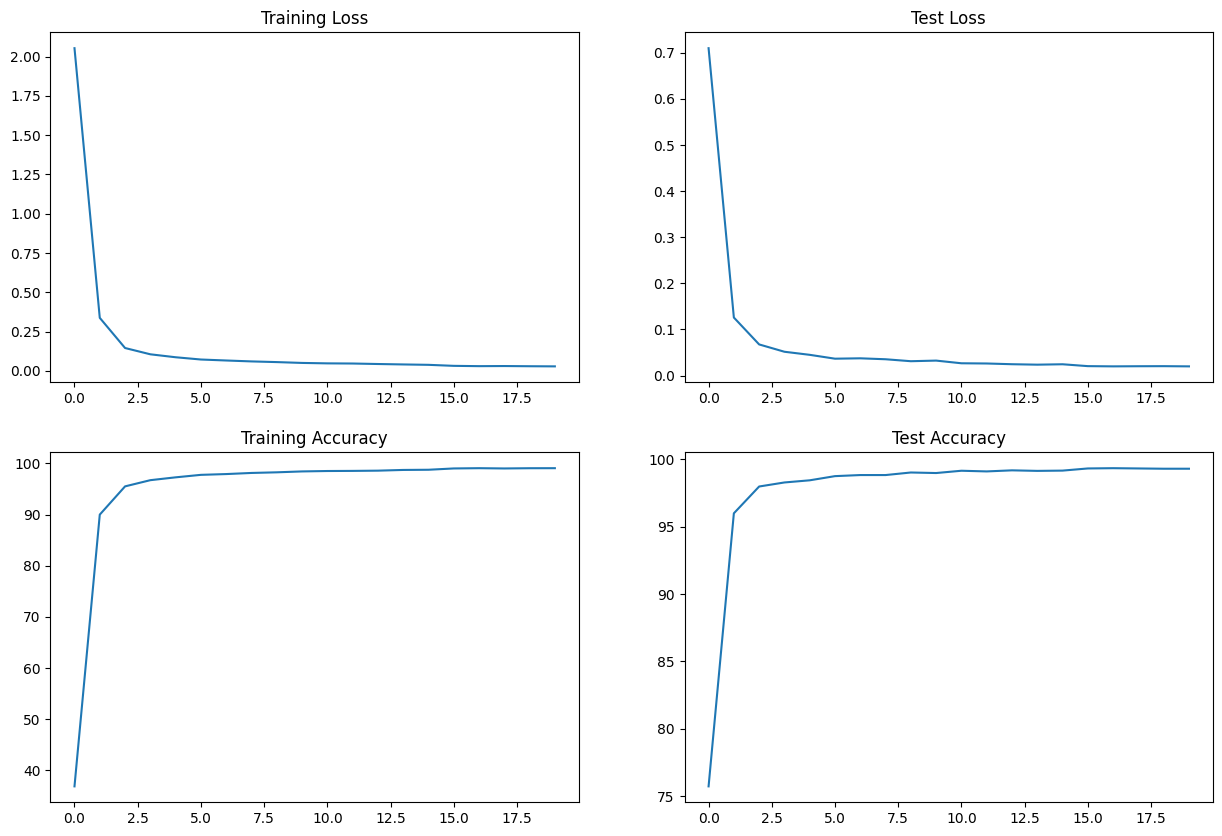

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")